In [ ]:
import pandas as pd
data = pd.read_csv("city_day.csv")
for col in data.columns:
    print(col)


City
Date
PM2.5
PM10
NO
NO2
NOx
NH3
CO
SO2
O3
Benzene
Toluene
Xylene
AQI
AQI_Bucket


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
None
              PM2.5          PM10            NO           NO2           NOx  \
count  24933.000

<ipython-input-31-08a0a5430fa3>:18: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)  # Fill missing values with mean


Mean Squared Error: 7755.477868493613
Mean Absolute Error: 59.726075977050364
R-squared: 0.48555891541543683


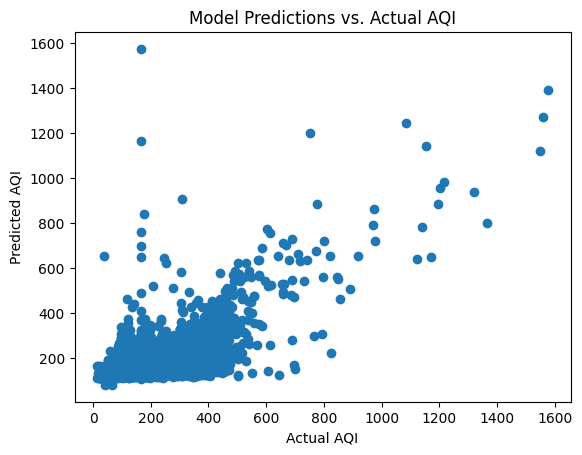

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv('/content/city_day.csv')

# Initial exploration
print(df.info())  # Check data types and missing values
print(df.describe())  # Summary statistics

# Data cleaning
df.drop_duplicates(inplace=True)  # Remove duplicates
df.fillna(df.mean(), inplace=True)  # Fill missing values with mean

# Feature engineering (example: aggregate PM2.5 levels over days)
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
daily_pm25_avg = df.groupby('Day')['PM2.5'].mean()

# Select numeric features (exclude non-numeric columns like 'City' and 'Date')
numeric_features = ['CO', 'Benzene', 'NO']
X = df[numeric_features]
y = df['AQI']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training (linear regression)
model = LinearRegression()
model.fit(X_train,y_train)

# Model evaluation
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

# Visualization (scatter plot)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Model Predictions vs. Actual AQI")
plt.show()


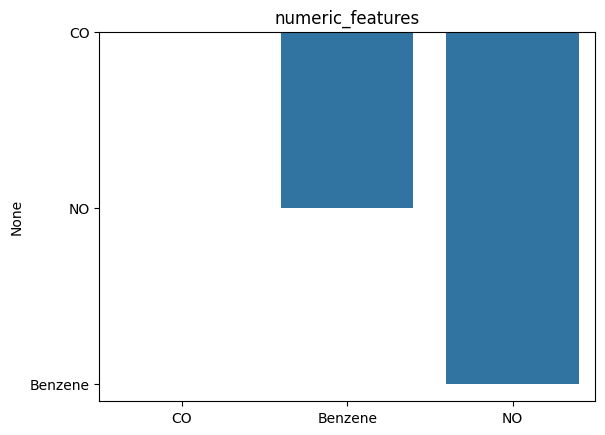

In [ ]:
sns.barplot(x=numeric_features, y=X.columns)
plt.title("numeric_features")
plt.show()